In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
sn.set()

In [2]:
df=pd.read_csv("..\\datasets\\interview-test\\usage_data.csv")

In [3]:
df.head()

,Date,Username,Feature,Sessions,Time spent,Average time spent
0,2017-06-01,kwalter,Reporting,14,23.0,1.642857
1,2017-06-01,kcarr,Roadmap,17,55.0,3.235294
2,2017-06-01,cstuart,Automation,13,2.0,0.153846
3,2017-06-01,mkelley,Task Creation,14,18.0,1.285714
4,2017-06-02,edillon,Task Creation,17,13.0,0.764706


In [4]:
users=df['Username'].unique()

In [5]:
feature=df['Feature'].unique()

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [22]:
df2=df[['Date','Sessions','Time spent']]
grouped_daily=df2.groupby('Date').sum().reset_index()
grouped_daily['Avg Time']=grouped_daily['Time spent']/grouped_daily['Sessions']
grouped_daily

,Date,Sessions,Time spent,Avg Time
0,2017-06-01,58,98.0,1.689655
1,2017-06-02,73,106.0,1.452055
2,2017-06-03,80,122.0,1.525000
3,2017-06-04,86,154.0,1.790698
4,2017-06-05,91,118.0,1.296703
...,...,...,...,...
2066,2023-01-27,76,86.0,1.131579
2067,2023-01-28,78,114.0,1.461538
2068,2023-01-29,91,123.0,1.351648
2069,2023-01-30,57,86.0,1.508772


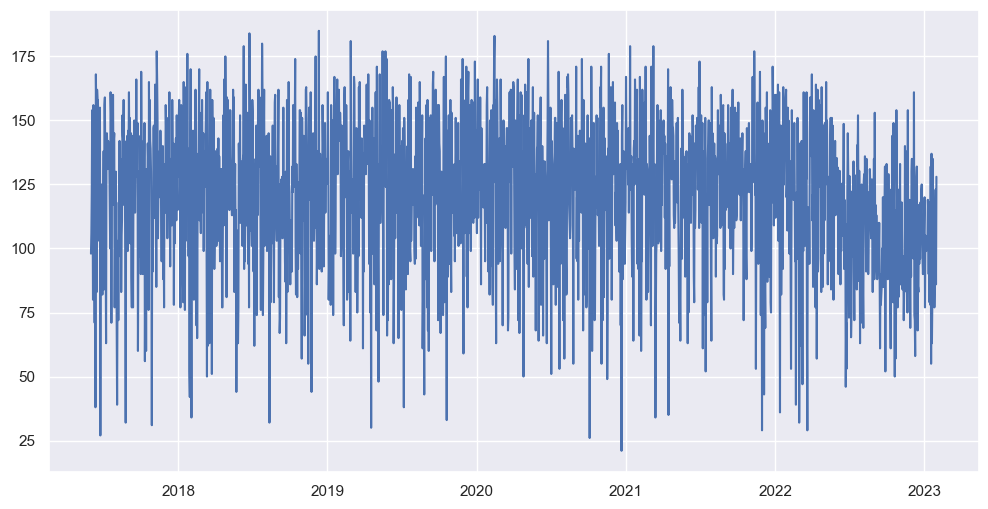

In [8]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(grouped_daily['Date'],grouped_daily['Time spent'])
plt.show()

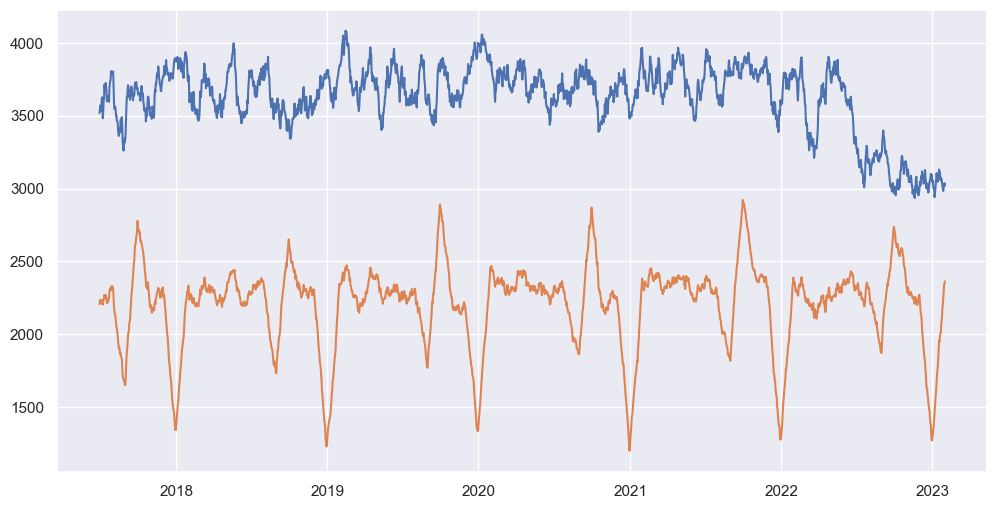

In [9]:
grouped_daily['mov_avg_30_time']=grouped_daily['Time spent'].rolling(30).sum()
grouped_daily['mov_avg_30_sessions']=grouped_daily['Sessions'].rolling(30).sum()
grouped_daily_subset=grouped_daily[grouped_daily['Date']>'2021-06-01']
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(grouped_daily['Date'],grouped_daily['mov_avg_30_time'])
ax.plot(grouped_daily['Date'],grouped_daily['mov_avg_30_sessions'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


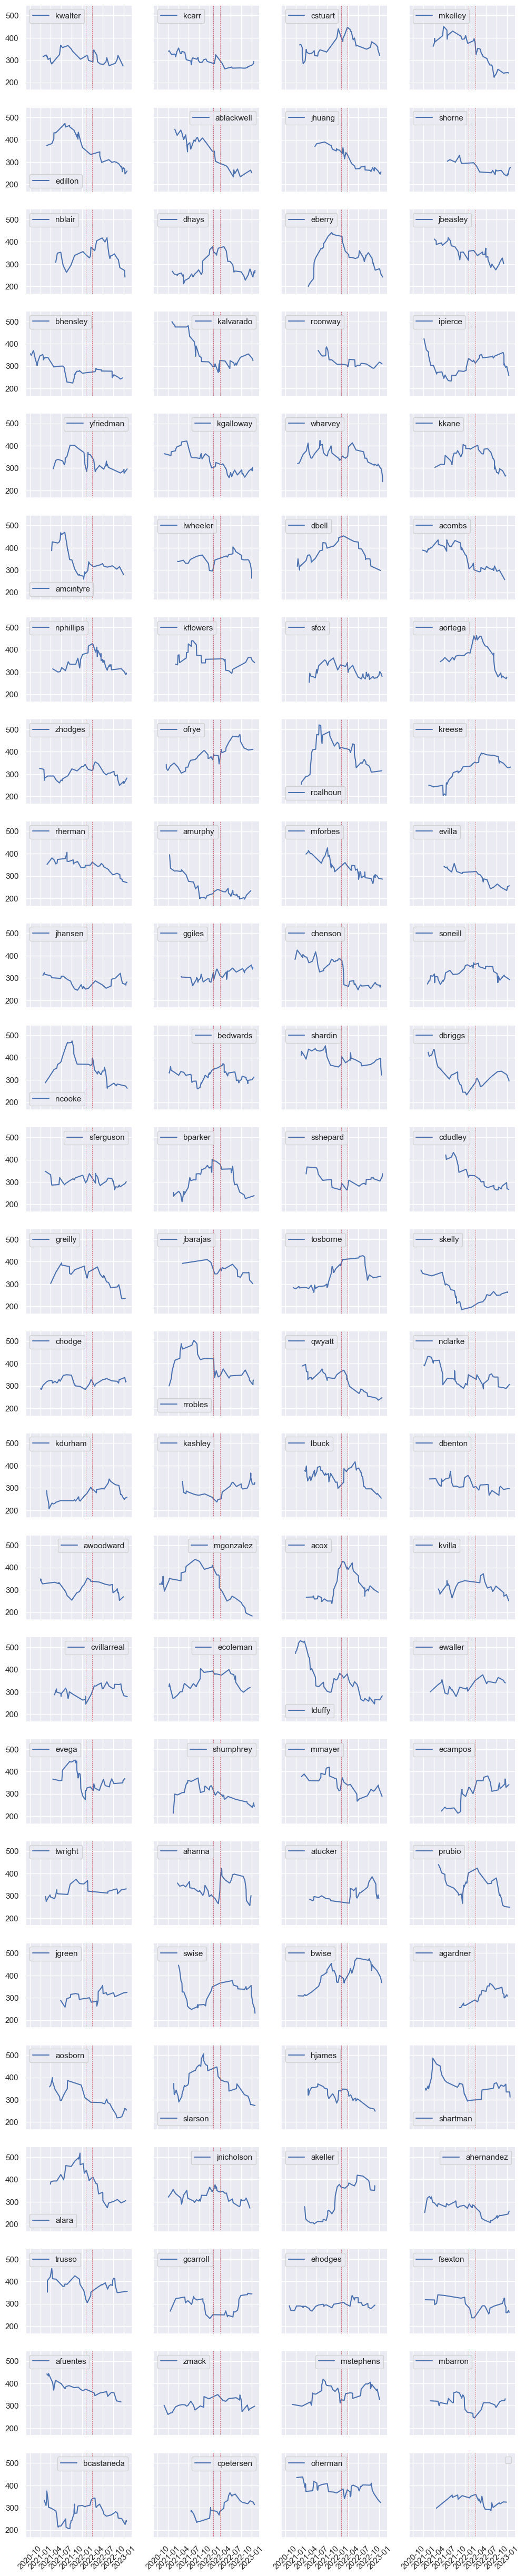

In [24]:
pd.options.mode.chained_assignment = None
ncols = 4
nrows = 25

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,2.5*nrows), sharex=True,sharey=True)

for (user, ax) in zip(users[:ncols*nrows], axes.flatten()):
    df_temp=df[(df['Username']==user) & (df['Date']>=pd.to_datetime('2020-06-01'))]
    df_temp['moving_avg']=df_temp['Time spent'].rolling(14).sum()
    ax.plot(df_temp['Date'],df_temp['moving_avg'])
    ax.legend([user])
    ax.axvline(x=pd.to_datetime('2022-02-01'),color='r',linewidth=0.5,linestyle='--')
    ax.axvline(x=pd.to_datetime('2022-03-31'),color='r',linewidth=0.5,linestyle='--')
    ax.tick_params(axis='x',labelrotation=45)
ax.legend()
plt.show()

In [11]:
df_user=df
df_user

,Date,Username,Feature,Sessions,Time spent,Average time spent
0,2017-06-01,kwalter,Reporting,14,23.0,1.642857
1,2017-06-01,kcarr,Roadmap,17,55.0,3.235294
2,2017-06-01,cstuart,Automation,13,2.0,0.153846
3,2017-06-01,mkelley,Task Creation,14,18.0,1.285714
4,2017-06-02,edillon,Task Creation,17,13.0,0.764706
...,...,...,...,...,...,...
10570,2023-01-31,swise,Account Managment,15,15.0,1.000000
10571,2023-01-31,cvillarreal,Automation,15,6.0,0.400000
10572,2023-01-31,slarson,Task Creation,16,13.0,0.812500
10573,2023-01-31,dhays,Roadmap,16,29.0,1.812500


In [12]:
df_user['user_count']=0
df_user

,Date,Username,Feature,Sessions,Time spent,Average time spent,user_count
0,2017-06-01,kwalter,Reporting,14,23.0,1.642857,0
1,2017-06-01,kcarr,Roadmap,17,55.0,3.235294,0
2,2017-06-01,cstuart,Automation,13,2.0,0.153846,0
3,2017-06-01,mkelley,Task Creation,14,18.0,1.285714,0
4,2017-06-02,edillon,Task Creation,17,13.0,0.764706,0
...,...,...,...,...,...,...,...
10570,2023-01-31,swise,Account Managment,15,15.0,1.000000,0
10571,2023-01-31,cvillarreal,Automation,15,6.0,0.400000,0
10572,2023-01-31,slarson,Task Creation,16,13.0,0.812500,0
10573,2023-01-31,dhays,Roadmap,16,29.0,1.812500,0


In [13]:
seen_users=set()
user_counts=dict()

In [14]:
for index,row in df_user.iterrows():
    seen_users.add(row['Username'])
    if row['Date'] in user_counts:
        user_counts[row['Date']]=max(user_counts[row['Date']],len(seen_users))
    else:
        user_counts[row['Date']]=len(seen_users)

In [15]:
user_counts_dataframe=pd.DataFrame(list(user_counts.items()),columns=['Date','user_count'])

In [16]:
user_counts_dataframe['Date']=pd.to_datetime(user_counts_dataframe['Date'])

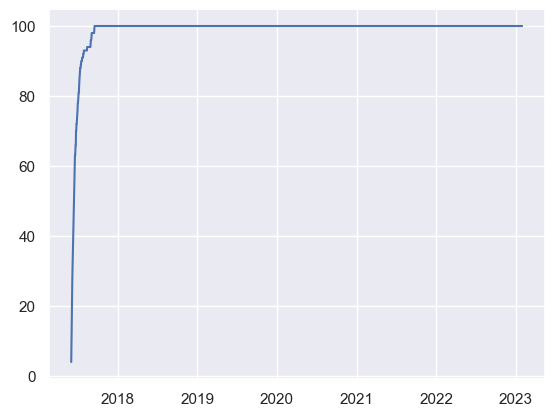

In [17]:
plt.plot(user_counts_dataframe['Date'],user_counts_dataframe['user_count'])

In [18]:
freq=df.groupby('Date')['user_count'].count().reset_index()

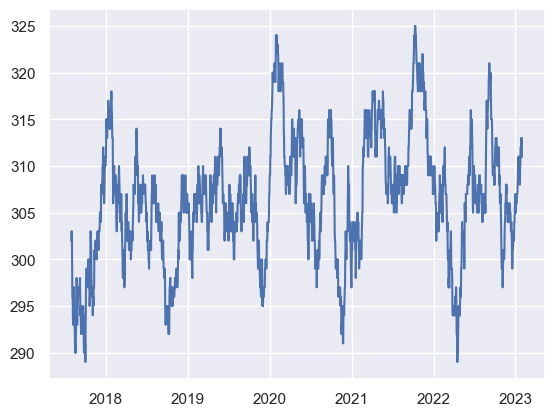

In [19]:
freq['user_freq']=freq['user_count'].rolling(60).sum()
plt.plot(freq['Date'],freq['user_freq'])

In [20]:
df[df['Username']=='dbell']

,Date,Username,Feature,Sessions,Time spent,Average time spent,user_count
24,2017-06-05,dbell,Account Managment,15,5.0,0.333333,0
218,2017-07-14,dbell,Saga Creation,14,29.0,2.071429,0
462,2017-09-02,dbell,Roadmap,19,53.0,2.789474,0
573,2017-09-25,dbell,Roadmap,20,45.0,2.250000,0
627,2017-10-05,dbell,Task Creation,15,14.0,0.933333,0
...,...,...,...,...,...,...,...
9814,2022-09-04,dbell,Reporting,21,30.0,1.428571,0
9996,2022-10-10,dbell,Task Creation,13,16.0,1.230769,0
10019,2022-10-15,dbell,Automation,14,12.0,0.857143,0
10042,2022-10-19,dbell,Roadmap,16,29.0,1.812500,0
